# Case Study: Adult Dataset

* Miguel Aaron Galicia Zainos-www.linkedin.com/in/mikeagz
* Python 3.6.13
* Models: Random Forest and Suport Vector Classifier

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Extract data from local files

I use pandas for reading data since they are comma separated files and using the dataset as dataframe allows me to perform some preprocessing operations easily. As they do not have titles (headers) I have inserted them manually. In the documentation it is indicated that the unknown values are represented with the symbol '?', they were replaced by "nan" values.

In [75]:
names = ["Age", "WorkClass",
         "fnlwgt", "education",
         "edu_num", "marital_status",
         "occupation", "relationship",
         "race", "sex", "capital_gain",
         "capital_loss", "hpweek", "native_country", "Income"]

data = pd.read_csv("data/adult.data",
                   delimiter=',',
                   header=None,
                   skipinitialspace=True,
                   na_values=['?'])
data.columns = names
data.head()


,Age,WorkClass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpweek,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
data_test = pd.read_csv("data/adult.test",
                        delimiter=',',
                        header=None,
                        skiprows=1,
                        skipinitialspace=True,
                        na_values=['?'])
data_test.columns = names
data_test.head()


,Age,WorkClass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hpweek,native_country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [77]:
data = pd.concat([data, data_test])
data.describe()


,Age,fnlwgt,edu_num,capital_gain,capital_loss,hpweek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Explore dataset


I need to verify some aspects such as:
* Missing or unavailable values
* Proportion of data used (classes and categorical variables)

In [78]:
data.isnull().sum()


Age                  0
WorkClass         2799
fnlwgt               0
education            0
edu_num              0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hpweek               0
native_country     857
Income               0
dtype: int64

Unavailable values can be removed or filled in, but both options may result in biased models.

It is proposed to fill in the missing values of each category with values such as "unknown", "unavailable", "inaccessible".


In [79]:
# data=data.dropna().reset_index(drop=True)
data["WorkClass"].fillna("unknown", inplace=True)
data["occupation"].fillna("unavailable", inplace=True)
data["native_country"].fillna("inaccessible", inplace=True)
print(data.isnull().sum())


Age               0
WorkClass         0
fnlwgt            0
education         0
edu_num           0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hpweek            0
native_country    0
Income            0
dtype: int64


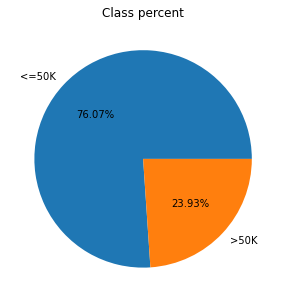

In [80]:
data["Income"].replace(["<=50K.", ">50K."],
               ["<=50K", ">50K"], inplace=True)
target_ratio = data["Income"].value_counts().to_dict()
plt.figure(figsize=(5, 5))
plt.title("Class percent")
plt.pie(x=target_ratio.values(), labels=target_ratio.keys(), autopct='%1.2f%%')
plt.show()


Esta diferencia de clases se debe considerar en el analisis del modelo.

This class difference must be considered in the analysis of the model.

# Preparing data for model

In [9]:
target = data.pop("Income").to_frame()
target.replace(["<=50K", ">50K", "<=50K.", ">50K."],
               [0, 1, 0, 1], inplace=True)


In [10]:
target.isnull()


,Income
0,False
1,False
2,False
3,False
4,False
...,...
16276,False
16277,False
16278,False
16279,False


## Numerical Data

In [11]:
num_data = data.select_dtypes(include='number')
num_data.head()


,Age,fnlwgt,edu_num,capital_gain,capital_loss,hpweek
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [12]:
num_data.describe()


,Age,fnlwgt,edu_num,capital_gain,capital_loss,hpweek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Categorical Data

In [13]:
cat_data = data.select_dtypes(exclude='number')
cat_data.head()


,WorkClass,education,marital_status,occupation,relationship,race,sex,native_country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [14]:
cat_data.describe(include='object')


,WorkClass,education,marital_status,occupation,relationship,race,sex,native_country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,15784,22379,6172,19716,41762,32650,43832


As can be seen in the table above, each categorical variable contains many individual values. Considering them all in one model may not be the most convenient since the distribution of each value in each categorical variable is not balanced. In addition, this would result in very large input dimensions that probably are not necessary. It is proposed to reduce some of these variables manually.

In [15]:
cat_data["WorkClass"].value_counts()


Private             33906
Self-emp-not-inc     3862
Local-gov            3136
unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: WorkClass, dtype: int64

Each row with gov work was replaced using only gov label

In [16]:
cat_data["WorkClass"].replace(
    ["Local-gov", "State-gov", "Federal-gov"], "gov", inplace=True)

cat_data["WorkClass"].value_counts()


/home/miguel/anaconda3/envs/actum/lib/python3.6/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Private             33906
gov                  6549
Self-emp-not-inc     3862
unknown              2799
Self-emp-inc         1695
Without-pay            21
Never-worked           10
Name: WorkClass, dtype: int64

In [17]:
cat_data["education"].value_counts()


HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Education levels was grouping on 3 levels: Elementary, HighSchool and Higher

In [18]:
cat_data["education"].replace(["Preschool",
                               "1st-4th",
                               "5th-6th",
                               "7th-8th"], "Elementary", inplace=True)

cat_data["education"].replace(["9th",
                               "10th",
                               "11th",
                               "12th"], "HighSchool", inplace=True)

cat_data["education"].replace(["HS-grad",
                               "Prof-school",
                               "Masters",
                               "Bachelors",
                               "Some-college",
                               "Prof-school",
                               "Doctorate"], "Higher", inplace=True)

cat_data["education"].replace(["Assoc-voc",
                               "Assoc-acdm"], "Assoc", inplace=True)

cat_data["education"].value_counts()


Higher        38772
HighSchool     4614
Assoc          3662
Elementary     1794
Name: education, dtype: int64

From numerical data we can see that "edu_num" has a particulary values, so:

In [19]:
num_data["edu_num"].value_counts()


9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: edu_num, dtype: int64

"edu_num" is a sparse representation of "education", I will remove the numeric variable to keep the group I initially proposed.

In [20]:
cat_data["marital_status"].value_counts()


Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

I will group two categories

In [21]:
cat_data["marital_status"].replace(["Divorced",
                                    "Separated"], "Separated", inplace=True)

cat_data["marital_status"].replace(
    ["Married-spouse-absent", "Married-AF-spouse"], "MarriedS", inplace=True)

cat_data["marital_status"].value_counts()


Married-civ-spouse    22379
Never-married         16117
Separated              8163
Widowed                1518
MarriedS                665
Name: marital_status, dtype: int64

In [22]:
cat_data["occupation"].value_counts()


Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
unavailable          2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [23]:
cat_data["relationship"].value_counts()


Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [24]:
cat_data["relationship"].replace(["Unmarried",
                                  "Not-in-family"], "Alone", inplace=True)


In [25]:
cat_data["race"].value_counts()


White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [26]:
cat_data["race"].replace(["Asian-Pac-Islander",
                          "Amer-Indian-Eskimo",
                          "Other"], "Other", inplace=True)


In [27]:
cat_data["native_country"].value_counts()


United-States                 43832
Mexico                          951
inaccessible                    857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [28]:
cat_data["native_country"].where(
    cat_data["native_country"] == "United-States", other="Other", inplace=True)


/home/miguel/anaconda3/envs/actum/lib/python3.6/site-packages/pandas/core/generic.py:9011: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast


In [29]:
cat_data.describe()


,WorkClass,education,marital_status,occupation,relationship,race,sex,native_country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,7,4,5,15,5,3,2,2
top,Private,Higher,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,33906,38772,22379,6172,19716,41762,32650,43832


The number of values in the categorical variables has been reduced, from here, a coding is made for use in the model.

In [30]:
num_data.drop('fnlwgt', axis=1, inplace=True)
num_data.drop('edu_num', axis=1, inplace=True)


/home/miguel/anaconda3/envs/actum/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
num_data.describe()


,Age,capital_gain,capital_loss,hpweek
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [32]:
num_target = pd.concat([num_data, target], axis=1)
num_target.describe()


,Age,capital_gain,capital_loss,hpweek,Income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382,0.239282
std,13.710510,7452.019058,403.004552,12.391444,0.426649
min,17.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,1.000000


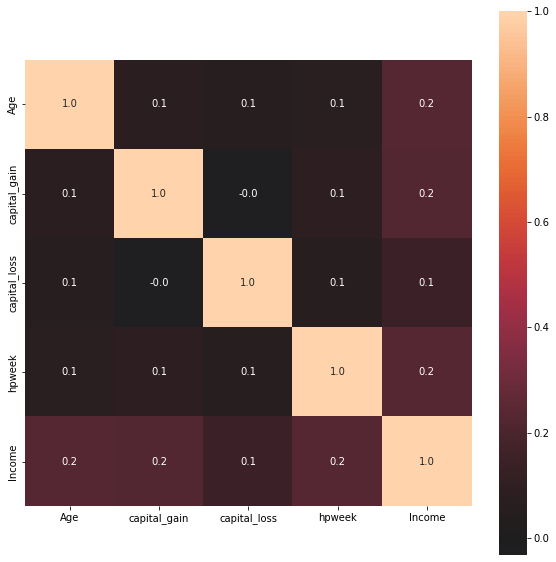

In [33]:

plt.figure(figsize=(10, 10))
sns.heatmap(num_target.corr(), square=True, annot=True, fmt='.1f', center=0)
plt.show()


From the above matrix, I can allow to keep the original features

In [34]:
# fast coding, I do not recommend it for complete systems.
OHE = pd.get_dummies(cat_data)
OHE


,WorkClass_Never-worked,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,WorkClass_Without-pay,WorkClass_gov,WorkClass_unknown,education_Assoc,education_Elementary,education_HighSchool,...,relationship_Other-relative,relationship_Own-child,relationship_Wife,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other,native_country_United-States
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
16277,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
16278,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
16279,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [35]:
X_data = pd.concat([num_data, OHE], axis=1)
X_data


,Age,capital_gain,capital_loss,hpweek,WorkClass_Never-worked,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,WorkClass_Without-pay,WorkClass_gov,...,relationship_Other-relative,relationship_Own-child,relationship_Wife,race_Black,race_Other,race_White,sex_Female,sex_Male,native_country_Other,native_country_United-States
0,39,2174,0,40,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
1,50,0,0,13,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,38,0,0,40,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,53,0,0,40,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,28,0,0,40,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,0,0,36,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
16277,64,0,0,40,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
16278,38,0,0,50,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
16279,44,5455,0,40,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [36]:
Y_data = np.ravel(target)
Y_data


array([0, 0, 0, ..., 0, 0, 1])

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data,
                                                    test_size=0.2,
                                                    random_state=2023)


# Baseline model: Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=20, max_depth=80, random_state=1)

RFC.fit(X_train, y_train)


RandomForestClassifier(max_depth=80, n_estimators=20, random_state=1)

In [63]:
RFC.score(X_train, y_train)


0.9509123947482917

In [64]:
RFC.score(X_test, y_test)


0.8347834988228069

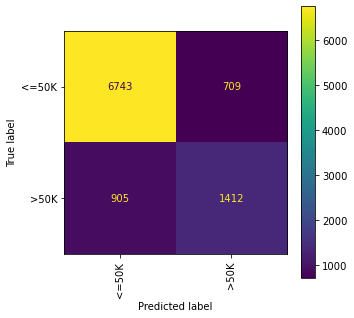

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels = ["<=50K", ">50K"]

y_pred = RFC.predict(X_test)
matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(matrix, display_labels=labels)
disp.plot(ax=ax, xticks_rotation='vertical')


As can be seen in the previous results, concerning the model score in training and in test, there is overfitting. This can be avoided with regularization techniques, such as reducing the depth of the model. In other words, simplifying the architecture.

In [66]:

RFC = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1)

RFC.fit(X_train, y_train)

RFC.score(X_train, y_train)


0.8421928185703683

In [67]:
RFC.score(X_test, y_test)


0.8407206469444161

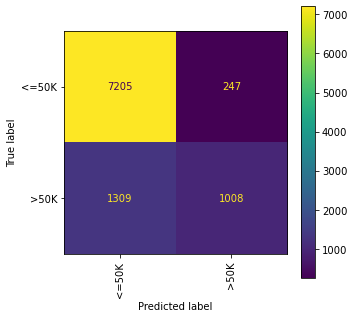

In [68]:
y_pred = RFC.predict(X_test)
matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(matrix, display_labels=labels)
disp.plot(ax=ax, xticks_rotation='vertical')


## Improve Baseline Model

In [69]:
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier()
params = {'max_depth': [5, 20, 60],
          'n_estimators': [5, 50, 100],
          'max_features': ["auto", "sqrt"]}
grid_RFC = GridSearchCV(RFC, params, refit=True, verbose=3, n_jobs=-1)
grid_RFC.fit(X_train,y_train)



Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 20, 60],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [5, 50, 100]},
             verbose=3)

In [70]:
from sklearn.metrics import classification_report

print(grid_RFC.best_params_) 
grid_rf_predictions = grid_RFC.predict(X_test) 

print(classification_report(y_test, grid_rf_predictions))

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7452
           1       0.76      0.59      0.67      2317

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



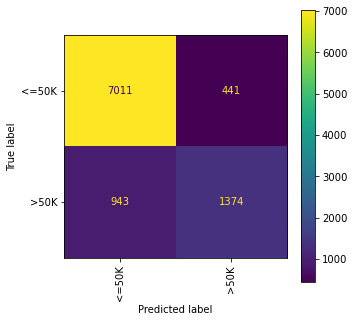

In [72]:
matrix = confusion_matrix(y_test, grid_rf_predictions, labels=[0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(matrix, display_labels=labels)
disp.plot(ax=ax, xticks_rotation='vertical')

# Second proposal: SVC

In [81]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [82]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
clf.score(X_train,y_train)

0.8537097228265043

In [83]:
clf.score(X_test,y_test)

0.8487050875217524

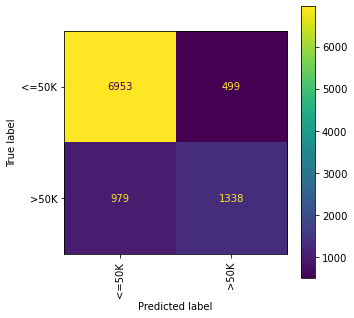

In [84]:
y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(matrix, display_labels=labels)
disp.plot(ax=ax, xticks_rotation='vertical')

## Improve SVC

In [89]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
                ('scaler', StandardScaler()), 
                ('svc', SVC(probability=True))])

params = {'svc__C': [1, 10],
          'svc__kernel': ['linear', 'poly']}

grid_SVC = GridSearchCV(pipe, params, refit=True, verbose=3, n_jobs=8)
grid_SVC.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=8,
             param_grid={'svc__C': [1, 10], 'svc__kernel': ['linear', 'poly']},
             verbose=3)

In [103]:
print(grid_SVC.best_params_) 
grid_svc_predictions = grid_SVC.predict(X_test) 

print(classification_report(y_test, grid_svc_predictions))
print(classification_report(y_test, grid_rf_predictions))

{'svc__C': 10, 'svc__kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7452
           1       0.71      0.60      0.65      2317

    accuracy                           0.85      9769
   macro avg       0.79      0.76      0.77      9769
weighted avg       0.84      0.85      0.84      9769

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7452
           1       0.76      0.59      0.67      2317

    accuracy                           0.86      9769
   macro avg       0.82      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



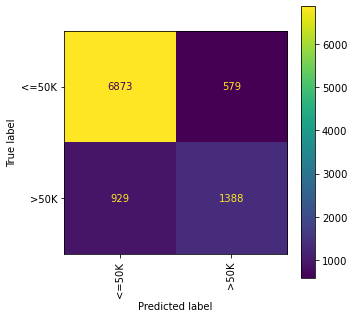

In [95]:
y_pred = grid_SVC.predict(X_test)
matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(matrix, display_labels=labels)
disp.plot(ax=ax, xticks_rotation='vertical')

# Model evaluation

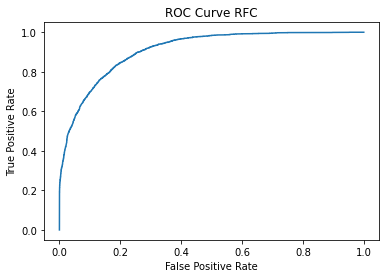

In [91]:
from sklearn.metrics import roc_curve

y_proba_RFC = grid_RFC.predict_proba(X_test)
fprRFC, tprRFC, thresholds = roc_curve(y_test, y_proba_RFC[:, 1])

plt.plot(fprRFC, tprRFC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RFC')
plt.show()

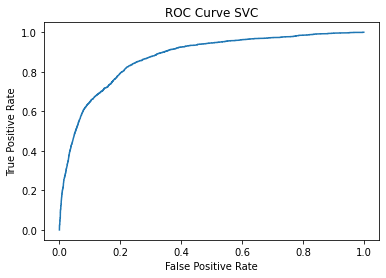

In [96]:
y_probaSVC = grid_SVC.predict_proba(X_test)
fprSVC, tprSVC, thresholds = roc_curve(y_test, y_probaSVC[:, 1])

plt.plot(fprSVC, tprSVC)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVC')
plt.show()

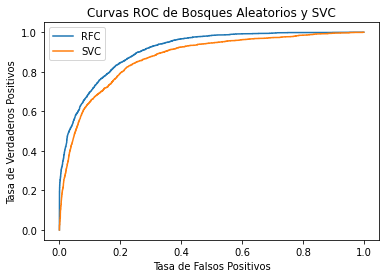

In [97]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_RFC[:, 1])  
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_probaSVC[:, 1])  

plt.plot(fpr_rf, tpr_rf, label='RFC')
plt.plot(fpr_svc, tpr_svc, label='SVC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC de Bosques Aleatorios y SVC')
plt.legend()
plt.show()

# Feature importance

## RFC

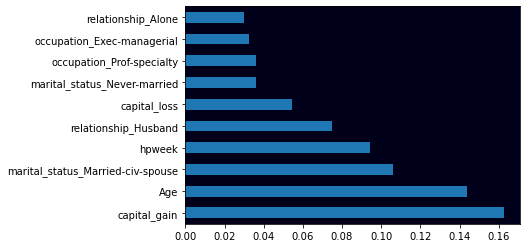

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
feat_importances_rf = pd.Series(grid_RFC.best_estimator_.feature_importances_, 
                                index=X_data.columns.to_list())
feat_importances_rf.nlargest(10).plot(kind='barh')
plt.show()

# Which model to choose?

According to the results obtained with RF we can conclude that:

* The unbalanced dataset has an impact on the accuracy of the model, since the accuracy metric is higher for class 0 (<=50K) than for class 1 (>50K).
* The recall metric indicates that the model has good ability to indicate false negatives, again, the model suffers due to unbalanced data.
* F1 score is high for class 0 and low for class 1 compared to 0.

While for SVC:
* The results obtained show the same behavior as the RFC model, however, an improvement in recall is seen.

Due to the performance of the model obtained with the classification report method, as well as the ROC curves, and considering that the RFC model takes much less time to train than SVC, **I would choose RFC as the best performing model**. 

It should be noted that RFC also offers a certain degree of explainability, since it is able to indicate the importance of the feature that is most relevant to the target.


# Problem analysis

I consider this to be an interesting problem, since it integrates varied and real information. Regarding the problem, obtaining predictions about the income of individuals would allow to:
* Offer/reject credit or investment opportunities to individuals who have a lower or higher income respectively.
* Obtain relevant information about the factors that provide the capacity to obtain higher income, such as academic preparation, type of employment, etc.
* A model that predicts income can also be useful as an indicator of the current state of the economy.

In summary, data sets such as this and predictive models can lead to business opportunities that promote cash flow.

I appreciate the opportunity to be considered at this technical stage. Best regards.

MAGZ

https://github.com/MichaelGaliciaZ/AdultDataset.git